In [93]:
from pandas import DataFrame
from pandas import read_csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [94]:
dataset = read_csv('with_timestamp.csv', header=0, index_col=0)
dataset.drop("@timestamp", axis=1, inplace=True)
dataset.head()

,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.per_sec.bytes,...,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct,anomaly
0,3.5818,0.0474,0.0312,0.1058,0.4182,0.2338,0.698,12.601,0.165,0.0,...,0.68,0.97,1.00,0.170,0.243,0.250,0.6904,0.0,0.9620,0
1,3.5080,0.0934,0.0271,0.1054,0.4920,0.2661,0.572,11.104,0.137,0.0,...,0.58,0.96,0.97,0.145,0.240,0.243,0.6903,0.0,0.9626,0
2,3.5337,0.1136,0.0291,0.1025,0.4663,0.2211,0.572,11.104,0.137,0.0,...,0.65,0.96,0.97,0.163,0.240,0.243,0.6904,0.0,0.9628,0
3,3.5742,0.0503,0.0201,0.0916,0.4258,0.2637,0.572,11.104,0.137,0.0,...,0.68,0.95,0.95,0.170,0.238,0.238,0.6903,0.0,0.9635,0
4,3.5454,0.0705,0.0268,0.1051,0.4546,0.2522,0.572,11.104,0.137,0.0,...,0.68,0.95,0.95,0.170,0.238,0.238,0.6905,0.0,0.9638,0


## Normalizing Data

In [95]:
dataset[dataset.columns] = StandardScaler().fit_transform(dataset)

## Shifting the dataset
shifting only one minute

In [96]:
dataset_shifted = dataset.shift(-1)
dataset = dataset.iloc[:-1]
dataset_shifted = dataset_shifted.iloc[:-1]

## Spliting the dataset 
Ratio - 80 : 20

In [97]:
train = dataset.shape[0] * 2 // 10
    
train_dataset = dataset.iloc[:-train]
train_dataset_shifted = dataset_shifted.iloc[:-train]

test_dataset = dataset.iloc[-train:]
test_dataset_shifted = dataset_shifted.iloc[-train:]

In [98]:
train_dataset = train_dataset.values.reshape((train_dataset.shape[0], 1, train_dataset.shape[1]))
print(train_dataset_shifted.shape)

(40000, 44)


## Training Models

In [99]:
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1, train_dataset_shifted.shape[1])))
model_lstm.add(Dense(44))
model_lstm.compile(loss='mae', optimizer='adam')

model_lstm.fit(train_dataset, train_dataset_shifted, verbose=2, shuffle=False)

Epoch 1/1
 - 5s - loss: 0.2394


## Predicting 

In [100]:
test_dataset_predicted = model_lstm.predict(test_dataset.values.reshape((test_dataset.shape[0], 1, test_dataset.shape[1])))

In [101]:
test_dataset_predicted_pd = DataFrame(test_dataset_predicted)
test_dataset_predicted_pd = test_dataset_predicted_pd.set_index(test_dataset_shifted.index)

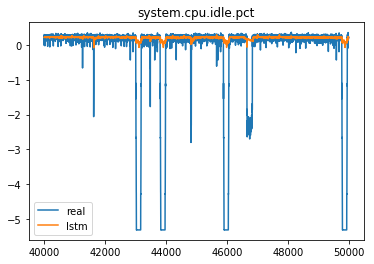

Mean Absolute Error :  0.4361145541678188


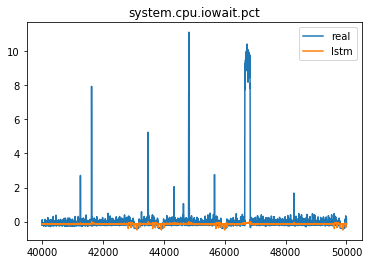

Mean Absolute Error :  0.2640690724265735


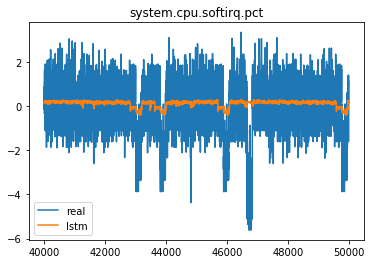

Mean Absolute Error :  0.7686247403152271


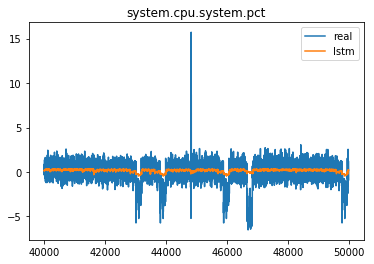

Mean Absolute Error :  0.7286980719594134


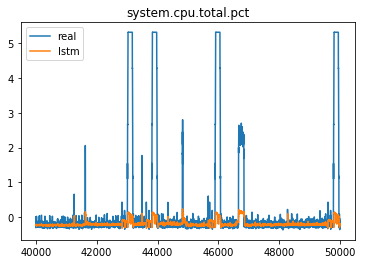

Mean Absolute Error :  0.4312418219914062


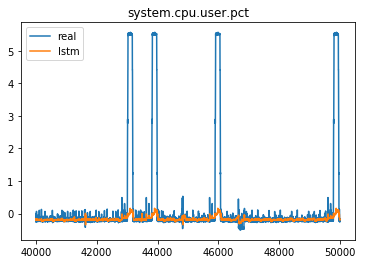

Mean Absolute Error :  0.39138472114152223


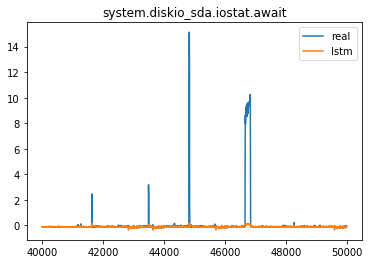

Mean Absolute Error :  0.21180491665888848


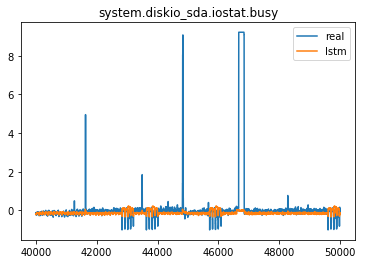

Mean Absolute Error :  0.3058918077422322


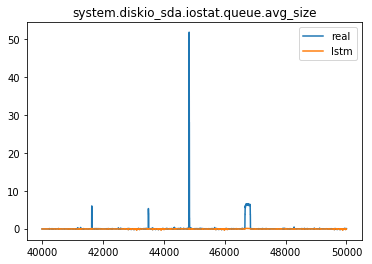

Mean Absolute Error :  0.21945467394389395


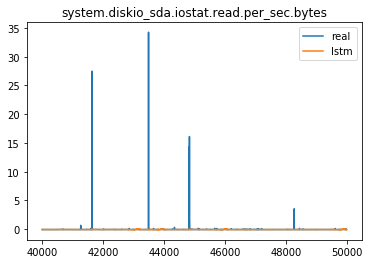

Mean Absolute Error :  0.07901715523103524


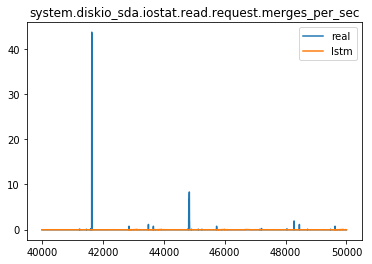

Mean Absolute Error :  0.05333844892529868


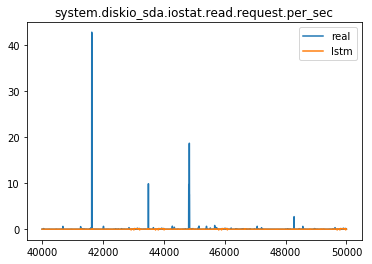

Mean Absolute Error :  0.08087036933756384


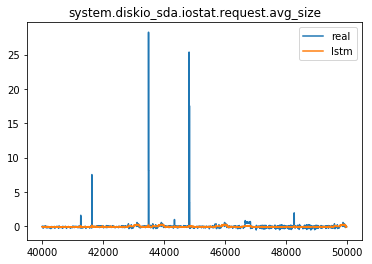

Mean Absolute Error :  0.13974213203933372


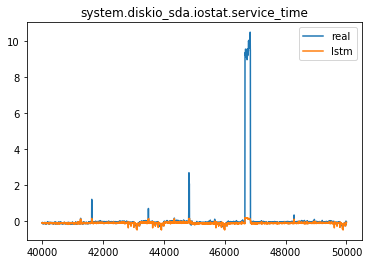

Mean Absolute Error :  0.21453201644990216


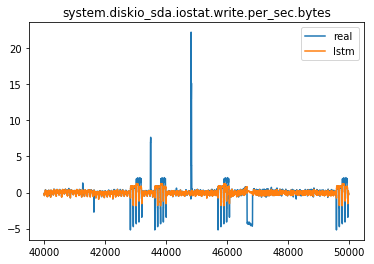

Mean Absolute Error :  0.2948550063223202


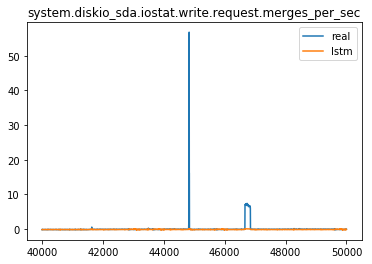

Mean Absolute Error :  0.23459291138810703


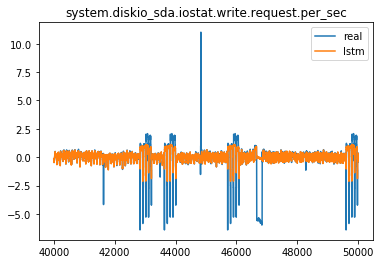

Mean Absolute Error :  0.30225195281196104


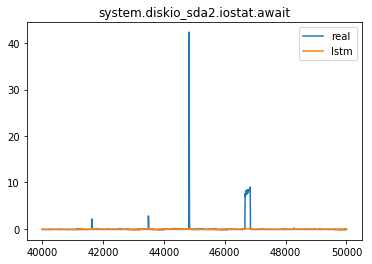

Mean Absolute Error :  0.20707488314482245


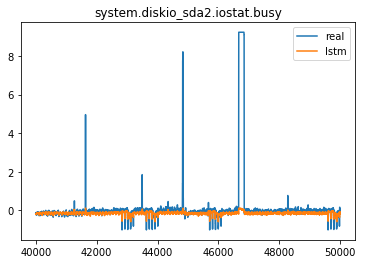

Mean Absolute Error :  0.2821643990960955


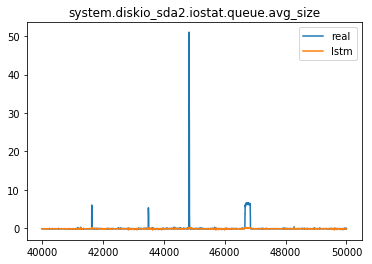

Mean Absolute Error :  0.20736037684635145


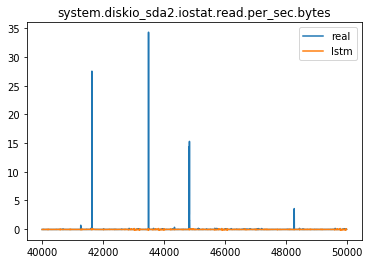

Mean Absolute Error :  0.08282890401177405


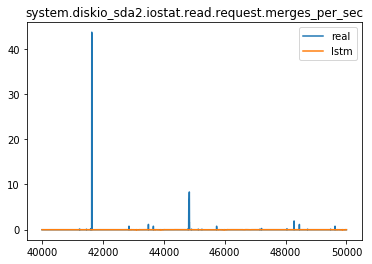

Mean Absolute Error :  0.053941910788383646


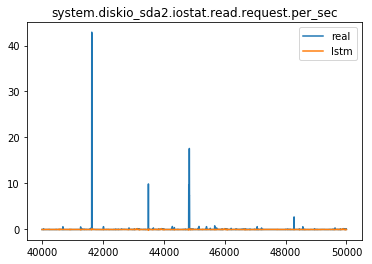

Mean Absolute Error :  0.07855992504895543


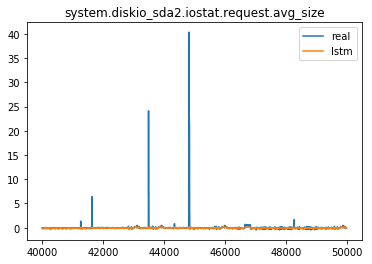

Mean Absolute Error :  0.141580345826866


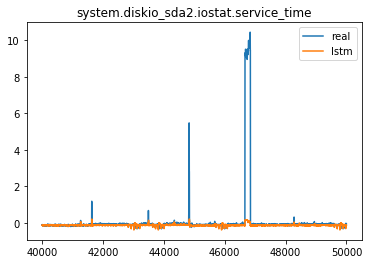

Mean Absolute Error :  0.2231988078838156


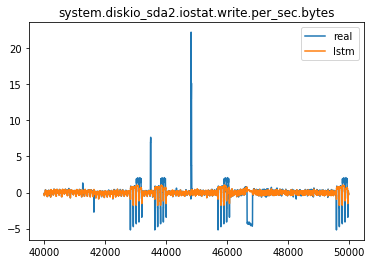

Mean Absolute Error :  0.30588136745967415


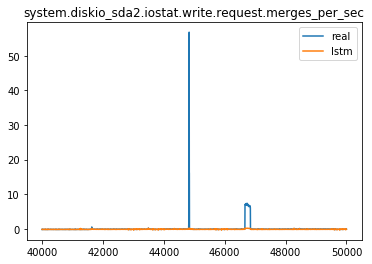

Mean Absolute Error :  0.22223621909274796


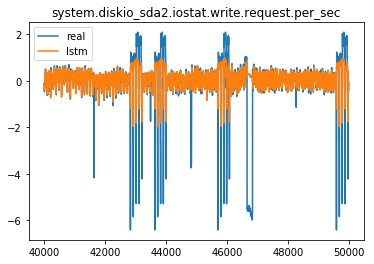

Mean Absolute Error :  0.32800906391069357


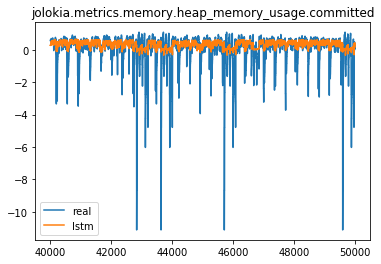

Mean Absolute Error :  0.5199267361979978


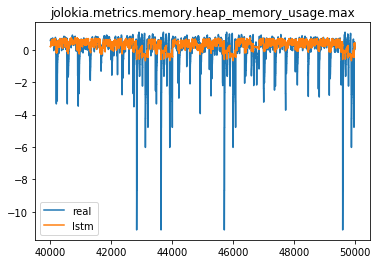

Mean Absolute Error :  0.5150582170701493


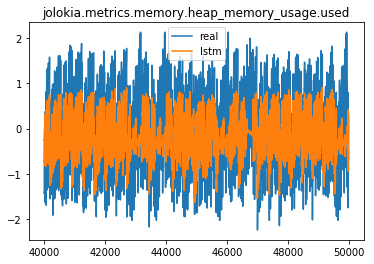

Mean Absolute Error :  0.5554817136348849


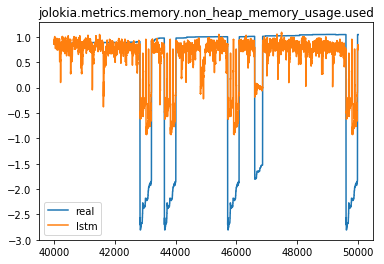

Mean Absolute Error :  0.48497554265003645


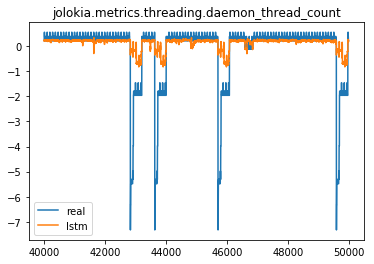

Mean Absolute Error :  0.4252648294694412


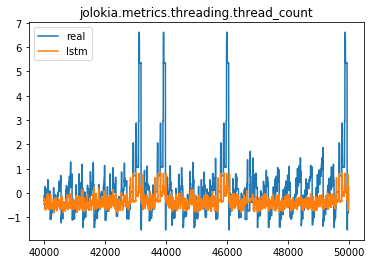

Mean Absolute Error :  0.669137801757513


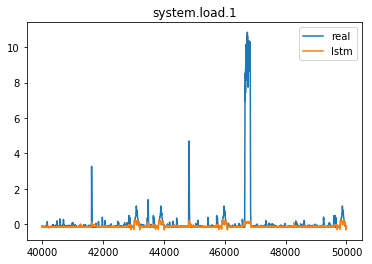

Mean Absolute Error :  0.22948370629296658


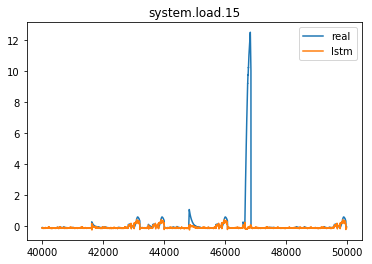

Mean Absolute Error :  0.21723341314373093


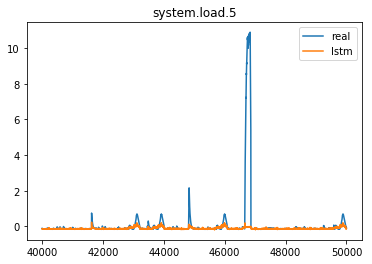

Mean Absolute Error :  0.2282514328588721


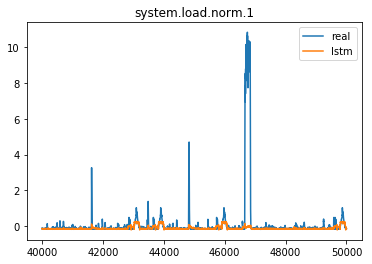

Mean Absolute Error :  0.232159804432618


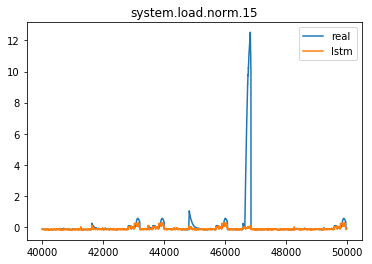

Mean Absolute Error :  0.21940789237463093


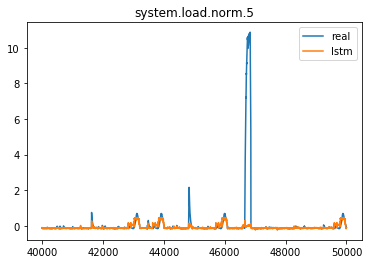

Mean Absolute Error :  0.22338825517870095


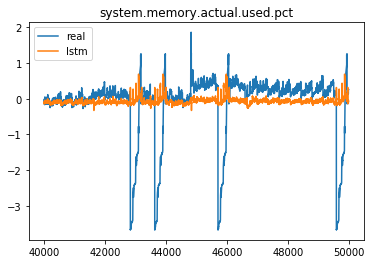

Mean Absolute Error :  0.4901614918428864


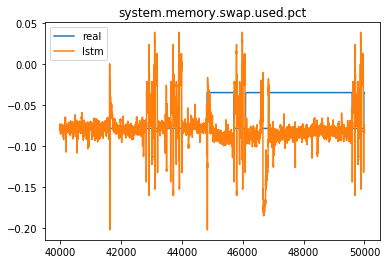

Mean Absolute Error :  0.03019651345590366


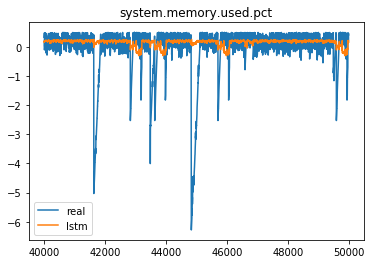

Mean Absolute Error :  0.40128337675148257


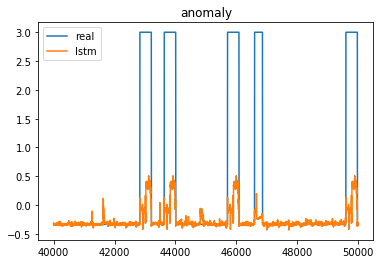

Mean Absolute Error :  0.5362161071493863


In [106]:
f = pyplot.figure()
for i in range(test_dataset_shifted.shape[1]):
    pyplot.plot(test_dataset_shifted[test_dataset_shifted.columns[i]], label='real')
    pyplot.plot(test_dataset_predicted_pd[test_dataset_predicted_pd.columns[i]], label='lstm')
    pyplot.legend()
    pyplot.title(test_dataset_shifted.columns[i])
    pyplot.show()
    print("Mean Absolute Error : ",mean_absolute_error(test_dataset_shifted[test_dataset_shifted.columns[i]], test_dataset_predicted_pd[test_dataset_predicted_pd.columns[i]]))